In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored as cl
import seaborn as sns
from matplotlib import style
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from openpyxl import load_workbook
import seaborn as sns

In [2]:
D1503=pd.read_excel('E1503.xlsx', index_col=0)
del D1503['Unnamed: 6']
del D1503['Unnamed: 13']

In [3]:
D1503.columns.values

array(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype=object)

In [4]:

D1503=D1503.drop('I')


In [5]:
D1503=D1503.rename(columns={'Unnamed: 1':'NCE', 'Unnamed: 2':'EPY', 'Unnamed: 3':'TPV', 'Unnamed: 4':'IP',
       'Unnamed: 5':'TSV', 'Unnamed: 7':'EP', 'Unnamed: 8':'STOCK', 'Unnamed: 9':'TA',
       'Unnamed: 10':'TCA', 'Unnamed: 11':'NVFA', 'Unnamed: 12':'TL', 'Unnamed: 14':'TOE',
       'Unnamed: 15':'BC', 'Unnamed: 16':'TPa', 'Unnamed: 17':'TOC', 'Unnamed: 18':'TPb'})

In [6]:
D1503

NCE        EPY        TPV        IP        TSV        EP  \
National To1al  140075.0  5685374.0  6019088.0  482418.0  6521641.0  273463.0   
Beijing           7419.0   456193.0   587192.0  104636.0    62513.5   18750.0   
Tianjin           5429.0   178490.0   269518.0   11855.0   284991.0    5636.0   
Hebei             2035.0    98632.0    86671.0    1308.0    98202.0    1546.0   
Shanxi            1430.0    83920.0    92741.0     732.0    99258.0     129.0   
Inner Mongolia     969.0    38091.0    34725.0    2844.0    39464.0    1132.0   
liaoning          3097.0    88878.0   130051.0    7273.0   139371.0    2243.0   
Jilin              879.0    42149.0    21255.0     184.0    23615.0     108.0   
Heilongjiang       754.0    43607.0    38197.0   10796.0    41738.0     340.0   
Shanghai          8824.0   613346.0  1016548.0  130041.0  1109313.0   44071.0   
Jiangsu          16110.0   486470.0   582245.0   35305.0   613343.0   39454.0   
Zhejiang         16332.0   463844.0   636799.0   30918.0   680160.0   53124.0   
Anhui             2912.0   116013.0    85766.0    5882.0    96083.0    3018.0   
Fujian            8673.0   245739.0    28795.3    2764.1   316762.0   20087.0   
Jiangxi           1676.0    95762.0    38825.0     263.0    48641.0    2337.0   
Shandong          9380.0   323269.0   300808.0   10589.0   330047.0   13640.0   
Henan             4305.0   195128.0   101977.0    1290.0   112819.0    2404.0   
Hubei             3369.0   201980.0   124626.0     542.0   141417.0    1427.0   
Hunon             2863.0   128621.0    65789.0    1865.0    68182.0    1609.0   
Guangdong        27931.0  1019959.0   816242.0   58398.0   874144.0   44062.0   
Guangxi           1782.0    77763.0    78909.0    1527.0    83767.0    2652.0   
Hainan             376.0    23421.0     2062.7     196.7    22932.0     236.0   
Chongqing         2420.0   106144.0    93670.0    5322.0    10416.2    1865.0   
Sichuan           3316.0   168574.0   111318.0    1612.0   123880.0    1423.0   
Guizhou           1332.0    62506.0    32751.0     319.0    45427.0     623.0   
Yunnan            1380.0    80258.0    80365.0     363.7    92495.0    3280.0   
Tibet               47.0     6400.0     1589.0       NaN     2524.0       NaN   
Shaanxi           1841.0    93347.0   115198.0    6696.0   125508.0    7220.0   
Gansu              737.0    37365.0    46999.0     263.0    50254.0     155.0   
Qinghai            198.0    12900.0     8427.0      90.0     9744.0      86.0   
Ningxia            236.0    12846.0    15193.0      48.0    15121.0      46.0   
Xinjiang          2023.0    83759.0    96111.0   18573.0   103141.0     761.0   

                   STOCK         TA        TCA     NVFA         TL       TOE  \
National To1al  350360.0  2938835.0  2299964.0  95180.0  2141754.0  799090.0   
Beijing          56548.0   448445.0   322478.0   7908.0   314504.0   13394.1   
Tianjin          14827.0   143064.0   121235.0   1990.0   116737.0   26313.0   
Hebei             4248.0    46315.0    36233.0   2346.0    32516.0   13753.0   
Shanxi            3344.0    52078.0    39645.0   2205.0    39781.0   12307.0   
Inner Mongolia    3225.0    21906.0    15937.0   1011.0    16038.0    5867.0   
liaoning          6421.0    70246.0    60789.0   1854.0    58585.0   11493.0   
Jilin             2878.0    13570.0    11261.0   1138.0    10783.0    2665.0   
Heilongjiang      4441.0    23320.0    19593.0   1341.0    19092.0    4219.0   
Shanghai         58248.0   371446.0   300176.0   7149.0    26018.1  111264.0   
Jiangsu          31042.0   252557.0   205609.0   7256.0   191506.0   61083.0   
Zhejiang         24466.0   259865.0   200449.0   5996.0   193561.0   66223.0   
Anhui             6445.0    45496.0    37220.0   7314.0    32727.0   12769.0   
Fujian           12915.0   132769.0     9362.2   3713.0    85576.0    4713.9   
Jiangxi           2210.0    26621.0    22108.0   1511.0    18491.0    8156.0   
Shandong         13004.0   143345.0   115934.0   4857.0   113778.0 

In [7]:
ProvenceTP=D1503['TPb']

In [8]:
ProvenceTP=ProvenceTP.drop('National To1al')

In [9]:
ProvenceTP

Beijing            1500.6
Tianjin            1861.0
Hebei              1204.0
Shanxi             1203.0
Inner Mongolia      465.0
liaoning           1164.0
Jilin               277.0
Heilongjiang        426.0
Shanghai          19673.0
Jiangsu           10086.0
Zhejiang          10711.0
Anhui              2119.0
Fujian             5000.0
Jiangxi            1822.0
Shandong           3409.0
Henan              2764.0
Hubei              3286.0
Hunon              2509.0
Guangdong         13565.0
Guangxi             901.0
Hainan              681.0
Chongqing          2497.0
Sichuan            2914.0
Guizhou            8901.0
Yunnan             2733.0
Tibet               175.0
Shaanxi            1961.0
Gansu               478.0
Qinghai             145.0
Ningxia              62.0
Xinjiang            728.0
Name: TPb, dtype: float64

<AxesSubplot:title={'center':'Indicators of Enterprises above Designated Size of Wholesale Trade by Region'}>

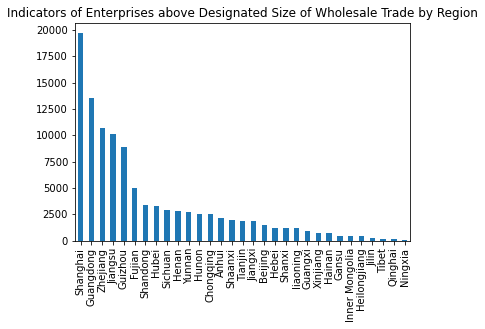

In [10]:
plt.title("Indicators of Enterprises above Designated Size of Wholesale Trade by Region")
ProvenceTP.sort_values(ascending=False).plot.bar()

In [11]:
scaler= StandardScaler()
print(scaler.fit(ProvenceTP.to_frame()))
scaler.var_

StandardScaler()


array([19913273.03725286])

In [12]:
ProvenceTP.var()

20577048.805161286

In [13]:
TPmean=ProvenceTP.mean()

In [14]:
ProvenceTP=pd.DataFrame(data=ProvenceTP)

In [15]:
ProvenceTA=D1503['TA']

In [16]:
PEva=D1503
PEva.columns.values

array(['NCE', 'EPY', 'TPV', 'IP', 'TSV', 'EP', 'STOCK', 'TA', 'TCA',
       'NVFA', 'TL', 'TOE', 'BC', 'TPa', 'TOC', 'TPb'], dtype=object)

In [17]:
PEva=D1503
del PEva['NCE']
del PEva['EPY']
del PEva['TPV']
del PEva['IP']
del PEva['TSV']
del PEva['EP']
del PEva['STOCK']
del PEva['TOC']
del PEva['TCA']
del PEva['NVFA']
del PEva['TL']
del PEva['TOE']
del PEva['BC']
del PEva['TPa']

In [18]:
PEva=PEva.drop('National To1al')

In [19]:
Data=MinMaxScaler().fit_transform(X=PEva,y=None)

In [20]:
Data.shape

(31, 2)

In [21]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
kmeans1=KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
kmeans1=kmeans1.fit(Data)

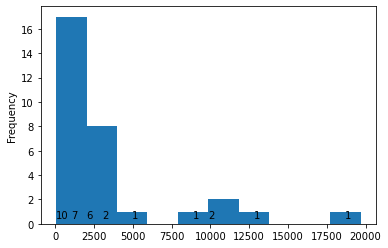

In [22]:
PTP=PEva['TPb']
PTP.plot.hist()
density, bins, _ = plt.hist(PTP, density=True, bins=20)
count, _ = np.histogram(PTP, bins)
for x,y,num in zip(bins, density, count):
    if num != 0:
        plt.text(x, y+0.5, num, fontsize=10)

In [23]:
y_pred = kmeans1.labels_
y_pred


array([1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
centroid = kmeans1.cluster_centers_
centroid 

array([[0.7181282 , 0.68567386],
       [1.        , 0.07335679],
       [0.09711991, 0.09428186]])

In [25]:
inertia = kmeans1.inertia_
inertia

0.6707762096682068

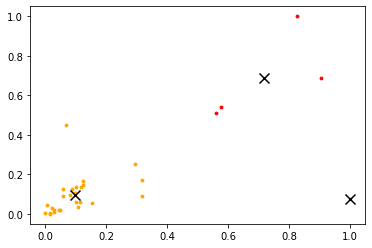

In [26]:
color = ['red','pink','orange']
n_clusters=3
fig,axi1=plt.subplots(1)
for i in range(n_clusters):
    axi1.scatter(Data[y_pred==i,0],Data[y_pred==i,1],marker='o',s=8,c=color[i])
axi1.scatter(centroid[:,0],centroid[:,1],marker='x',s=100,c='black')
plt.show()

In [27]:
D1503=pd.read_excel('E1503.xlsx', index_col=0)
del D1503['Unnamed: 6']
del D1503['Unnamed: 13']
D1503=D1503.rename(columns={'Unnamed: 1':'NCE', 'Unnamed: 2':'EPY', 'Unnamed: 3':'TPV', 'Unnamed: 4':'IP',
       'Unnamed: 5':'TSV', 'Unnamed: 7':'EP', 'Unnamed: 8':'STOCK', 'Unnamed: 9':'TA',
       'Unnamed: 10':'TCA', 'Unnamed: 11':'NVFA', 'Unnamed: 12':'TL', 'Unnamed: 14':'TOE',
       'Unnamed: 15':'BC', 'Unnamed: 16':'TPa', 'Unnamed: 17':'TOC', 'Unnamed: 18':'TPb'})

In [28]:
EPY=D1503['EPY']

In [29]:
EPY=EPY.drop('National To1al')
EPY=EPY.drop('I')

<AxesSubplot:ylabel='EPY'>

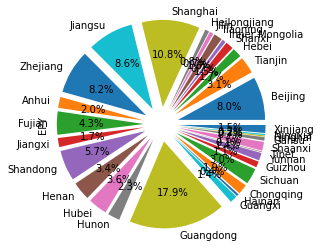

In [30]:
EPY.plot.pie(autopct='%1.1f%%',explode=(0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2))

In [31]:
Graph=D1503[:]
Graph=Graph.drop('National To1al')
Graph=Graph.drop('I')

In [32]:
Graph.columns.values

array(['NCE', 'EPY', 'TPV', 'IP', 'TSV', 'EP', 'STOCK', 'TA', 'TCA',
       'NVFA', 'TL', 'TOE', 'BC', 'TPa', 'TOC', 'TPb'], dtype=object)

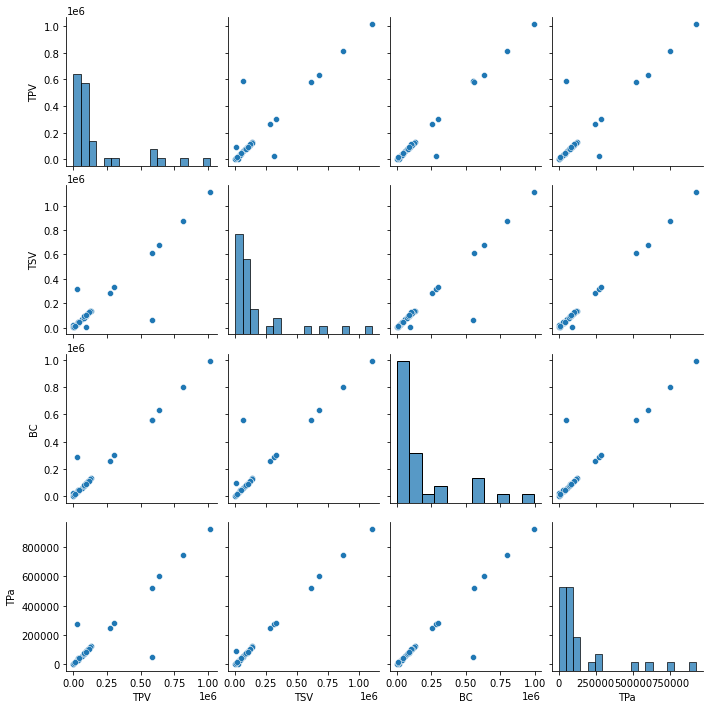

In [33]:
sns.pairplot(Graph[['TPV','TSV','BC','TPa']])

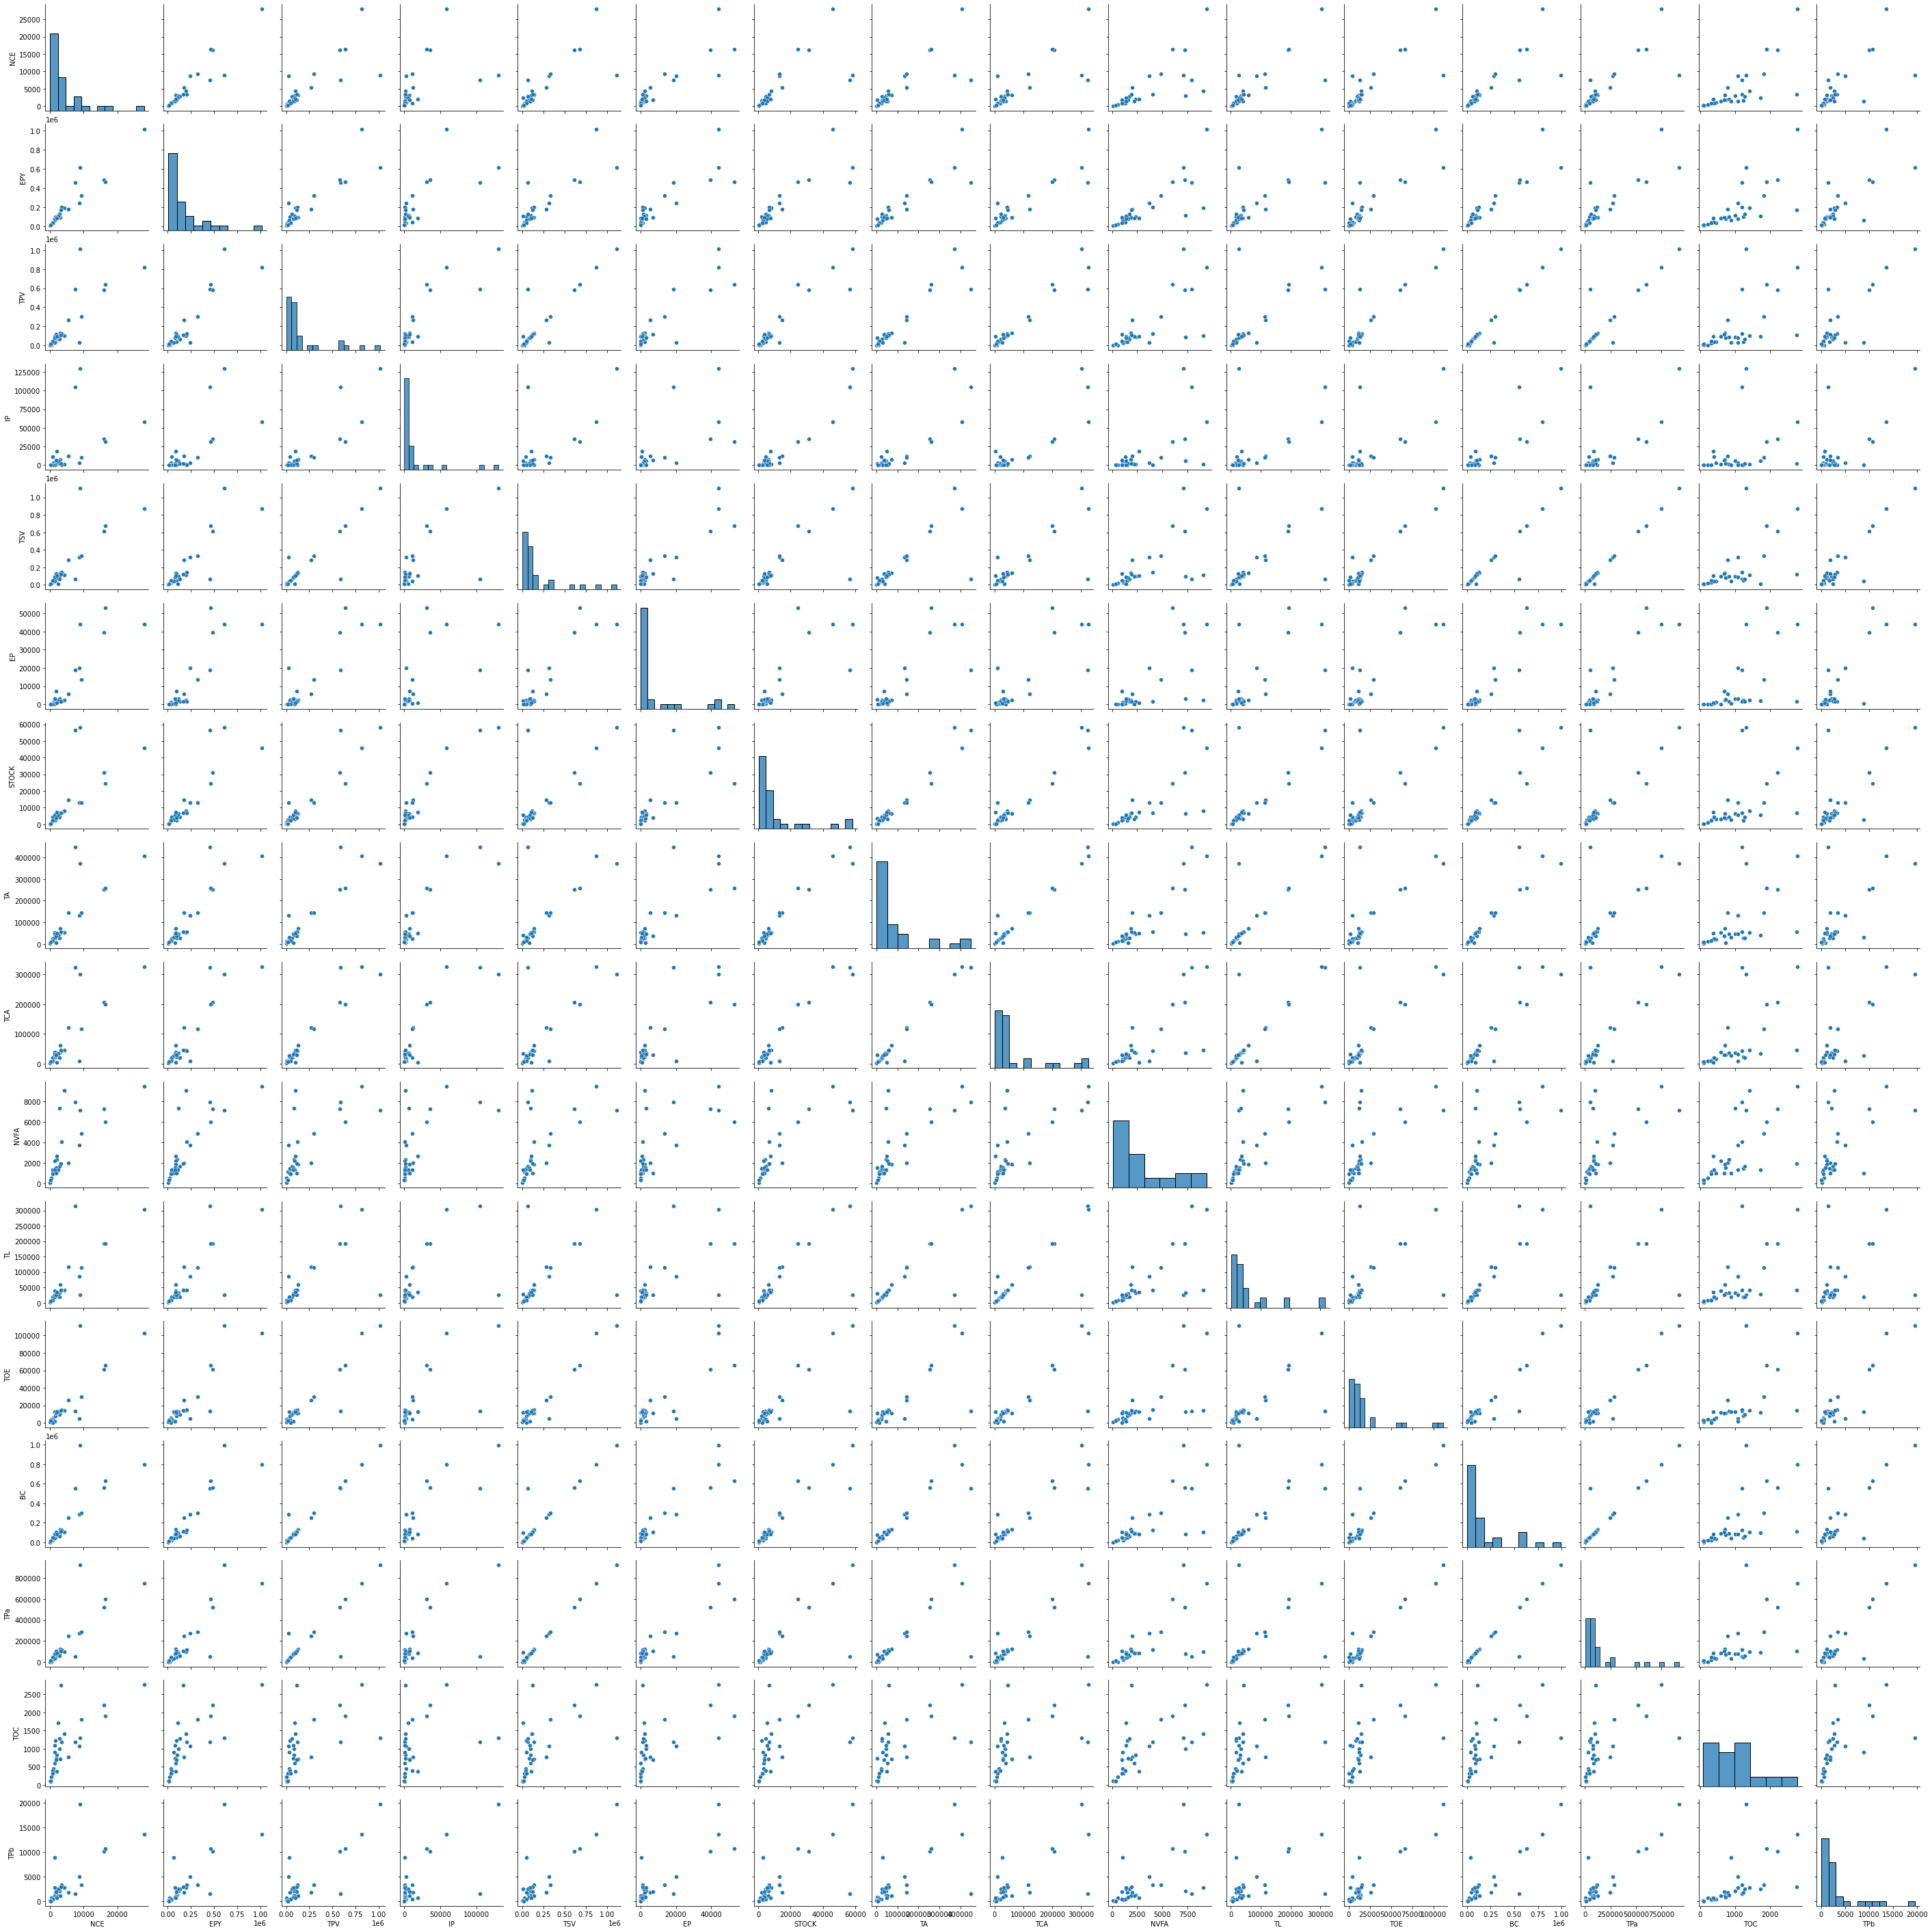

In [34]:
sns.pairplot(Graph)

<AxesSubplot:>

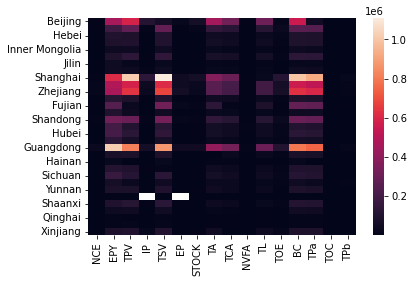

In [35]:
sns.heatmap(Graph)

([<matplotlib.axis.XTick at 0x1184510b580>], [Text(0, 0, '')])

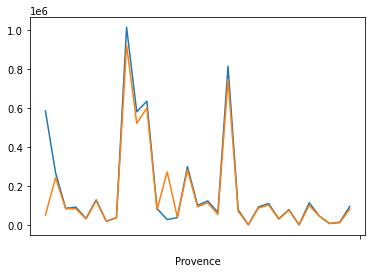

In [36]:
plt.plot(Graph['TPV'])
plt.plot(Graph['TPa'])
plt.xlabel('Provence')
plt.xticks(' ')

In [37]:
EPY

Beijing            456193.0
Tianjin            178490.0
Hebei               98632.0
Shanxi              83920.0
Inner Mongolia      38091.0
liaoning            88878.0
Jilin               42149.0
Heilongjiang        43607.0
Shanghai           613346.0
Jiangsu            486470.0
Zhejiang           463844.0
Anhui              116013.0
Fujian             245739.0
Jiangxi             95762.0
Shandong           323269.0
Henan              195128.0
Hubei              201980.0
Hunon              128621.0
Guangdong         1019959.0
Guangxi             77763.0
Hainan              23421.0
Chongqing          106144.0
Sichuan            168574.0
Guizhou             62506.0
Yunnan              80258.0
Tibet                6400.0
Shaanxi             93347.0
Gansu               37365.0
Qinghai             12900.0
Ningxia             12846.0
Xinjiang            83759.0
Name: EPY, dtype: float64